# 聚类
* 聚类是一种无监督学习，把相似的数据划分到一起，不关心这一类的标签，类别数目也可能未知
* 分类是一种有监督学习，把不同数据划分开，通过训练数据集获得一个分类器，再通过这个分类器去预测。

聚类的本质是描述性统计，而不是推断统计。是创造假设而不是验证假设。

## 数据准备

In [29]:
import numpy as np
import pandas as pd
data = pd.read_csv('/data/Iris.csv')
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
y = y.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

## 1.Kmeans

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(X)

print('分类结果:',kmeans.labels_)
print('各类别中心', kmeans.cluster_centers_)

分类结果: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
各类别中心 [[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


E:\ProgramData\anaconda3\envs\py3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\ProgramData\anaconda3\envs\py3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
np.sum(kmeans.labels_ == y)

134

In [35]:
y.shape

(150,)

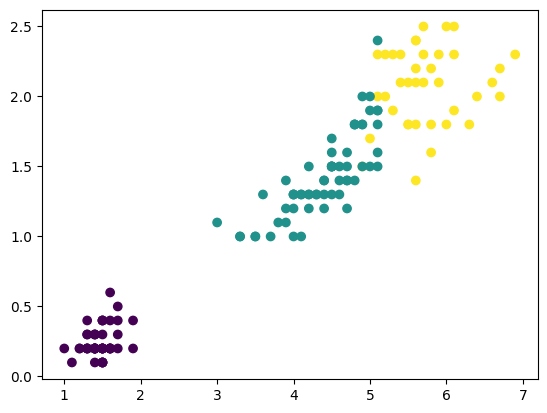

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=[kmeans.labels_])
plt.show()

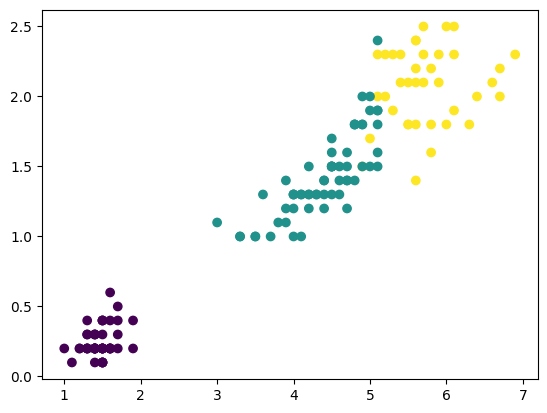

In [48]:
plt.scatter(X.iloc[:,2], X.iloc[:,3], c=[kmeans.labels_])
plt.show()

## 2.DBSCAN
某个区域点的密度足够大的时候，这些点就被归为同一类。只要给定范围参数$\epsilon$即可，不需要指定分为几类。

* 优点：可以发现各种特殊形状的类别，也可以很好处理异常值
* 缺点：假设了各种类别密度相同，如果各类别密度差异很大，效果不好。

In [40]:
from sklearn.cluster import DBSCAN
dbscan1 = DBSCAN(eps=0.5)
dbscan1.fit(X)
print(dbscan1.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


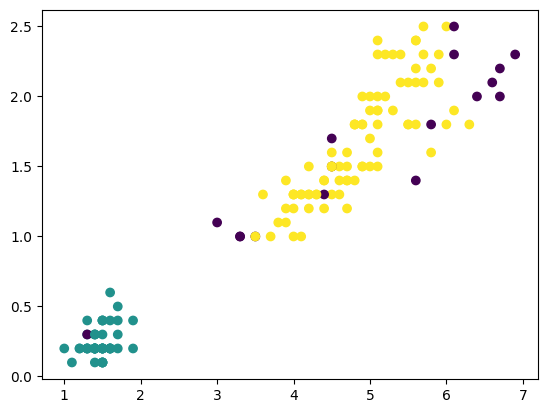

In [46]:
plt.scatter(X.iloc[:,2], X.iloc[:,3], c=[dbscan1.labels_])
plt.show()

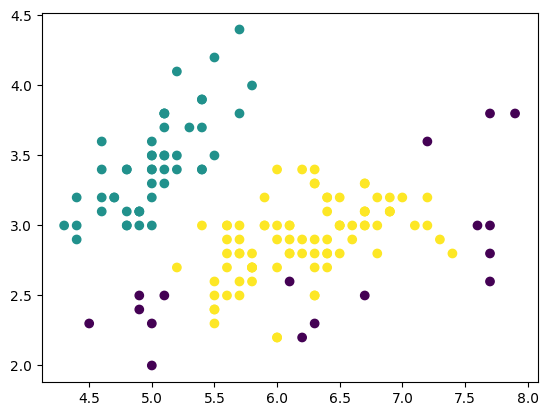

In [47]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=[dbscan1.labels_])
plt.show()